# The 3rd Question: 
# How does the production budget affect its popularity and profit?

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import int64
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import and preview datasets

### tmdb_movie dataset

In [2]:
# Read the data file and preview some general info 
tmdb_movie = pd.read_csv('data/cleaned_tmdb_movie.csv')
print(tmdb_movie.shape)
print(tmdb_movie.isna().sum())
tmdb_movie.head()

(26334, 9)
id                0
original_title    0
popularity        0
release_date      0
title             0
vote_average      0
vote_count        0
month             0
day_of_week       0
dtype: int64


,id,original_title,popularity,release_date,title,vote_average,vote_count,month,day_of_week
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,Friday
1,10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,Friday
2,10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,Friday
3,27205,Inception,27.920,2010-07-16,Inception,8.3,22186,7,Friday
4,32657,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2,Thursday


In [3]:
# Set 'title' column as index
tmdb_movie.set_index('title', inplace=True)

In [4]:
# Drop unnecessary columns 
tmdb_movie = tmdb_movie.drop(['id', 'original_title', 'month', 'day_of_week'], axis=1).copy()
tmdb_movie.head()

,popularity,release_date,vote_average,vote_count
title,,,,
Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,28.734,2010-03-26,7.7,7610
Iron Man 2,28.515,2010-05-07,6.8,12368
Inception,27.920,2010-07-16,8.3,22186
Percy Jackson & the Olympians: The Lightning Thief,26.691,2010-02-11,6.1,4229


### tn_budget dataset

In [5]:
# Read the data file and preview some general info 
tn_budget = pd.read_csv('data/cleaned_tn_budget.csv')
print(tn_budget.shape)
print(tn_budget.isna().sum())
tn_budget.head()

(4317, 7)
title                0
id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit               0
dtype: int64


,title,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,Avatar,1,2009-12-18,425000000,760507625,2776345279,2351345279
1,Pirates of the Caribbean: On Stranger Tides,2,2011-05-20,410600000,241063875,1045663875,635063875
2,Avengers: Age of Ultron,4,2015-05-01,330600000,459005868,1403013963,1072413963
3,Star Wars Ep. VIII: The Last Jedi,5,2017-12-15,317000000,620181382,1316721747,999721747
4,Star Wars Ep. VII: The Force Awakens,6,2015-12-18,306000000,936662225,2053311220,1747311220


In [6]:
# Remove unneccessary column and set 'title' as index
tn_budget = tn_budget.drop(['id'], axis=1).copy()
tn_budget.set_index('title', inplace=True)
tn_budget.head()

,release_date,production_budget,domestic_gross,worldwide_gross,profit
title,,,,,
Avatar,2009-12-18,425000000,760507625,2776345279,2351345279
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,635063875
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,1072413963
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1316721747,999721747
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,936662225,2053311220,1747311220


## Create a new SQL database and import two existing dataframes to it

In [7]:
# Create a new SQL database, named 'movie_info'
conn = sqlite3.connect('data/movie_info.db')
cur = conn.cursor()

In [8]:
# Create a new table 'movie_pop' in the SQL database
cur.execute('''CREATE TABLE movie_pop(title TEXT PRIMARY KEY,
                                      popularity REAL,
                                      release_date DATE,
                                      vote_average REAL,
                                      vote_count INTEGER)''')
conn.commit()

In [9]:
# Change dataframe 'tmdb_movie' to 'movie_pop' SQL table
tmdb_movie.to_sql('movie_pop', conn, if_exists='replace')

In [10]:
#Create a new table 'movie_profit' in the SQL database
cur.execute('''CREATE TABLE movie_profit(title TEXT PRIMARY KEY,
                                         id INTEGER,
                                         release_date DATE,
                                         production_budget INTEGER,
                                         domestic_gross INTEGER,
                                         worldwide_gross INTEGER,
                                         profit INTERGER)''')
conn.commit()

In [11]:
# Change dataframe 'tn_budget' to 'movie_profit' SQL table
tn_budget.to_sql('movie_profit', conn, if_exists='replace')

In [12]:
# Review the data from 'movie_pop' table
cur.execute('''SELECT * FROM movie_pop;''')
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [i[0] for i in cur.description]
df1.head()

,title,popularity,release_date,vote_average,vote_count
0,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
1,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
2,Iron Man 2,28.515,2010-05-07,6.8,12368
3,Inception,27.920,2010-07-16,8.3,22186
4,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,6.1,4229


In [13]:
# Review the data 'movie_profit' table
cur.execute('''SELECT * FROM movie_profit;''')
df2 = pd.DataFrame(cur.fetchall())
df2.columns = [i[0] for i in cur.description]
df2.head()

,title,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,Avatar,2009-12-18,425000000,760507625,2776345279,2351345279
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,635063875
2,Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,1072413963
3,Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1316721747,999721747
4,Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,936662225,2053311220,1747311220


## Correlation between Production Budget and Popularity

In [14]:
# Connect 'movie_profit' and 'movie_pop' tables and show the result in DataFrame 'join_info'
cur.execute('''SELECT movie_pop. *, production_budget, worldwide_gross, profit
               FROM movie_profit
               JOIN movie_pop
               ON movie_profit.title = movie_pop.title;''')
join_info = pd.DataFrame(cur.fetchall())
join_info.columns = [i[0] for i in cur.description]
join_info.head()

,title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,profit
0,Avatar,26.526,2009-12-18,7.4,18676,425000000,2776345279,2351345279
1,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,410600000,1045663875,635063875
2,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,330600000,1403013963,1072413963
3,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,300000000,2048134200,1748134200
4,Justice League,34.953,2017-11-17,6.2,7510,300000000,655945209,355945209


In [15]:
# Import the necessary package and set up 'def' functions to calculate the correlation
import math
def mean_normalize(var):
    n = len(var)
    total = sum(var)
    mean = total / n
    
    norm = []
    for element in var:
        difference = (element - mean)
        norm.append(difference)
    return norm

def dot_product(x, y):
    sum_product = 0
    for element in range(len(x)):
        product = x[element] * y[element]
        sum_product += product
    return sum_product

def correlation(var1, var2):
    
    x = mean_normalize(var1)
    y = mean_normalize(var2)
    prod = dot_product(x, y)
    
    sq_x = [i * i for i in x]
    sq_y = [i * i for i in y]
    prod2 = dot_product(sq_x, sq_y)
    corr = round((prod / math.sqrt(sum(sq_x) * sum(sq_y))), 2)
    return corr

#Calculate the correlation between Production Budget and Profit
print('Correlation value between Production Budget and Popularity: ', 
      (correlation(join_info['production_budget'], join_info['popularity'])))

Correlation value between Production Budget and Popularity:  0.57


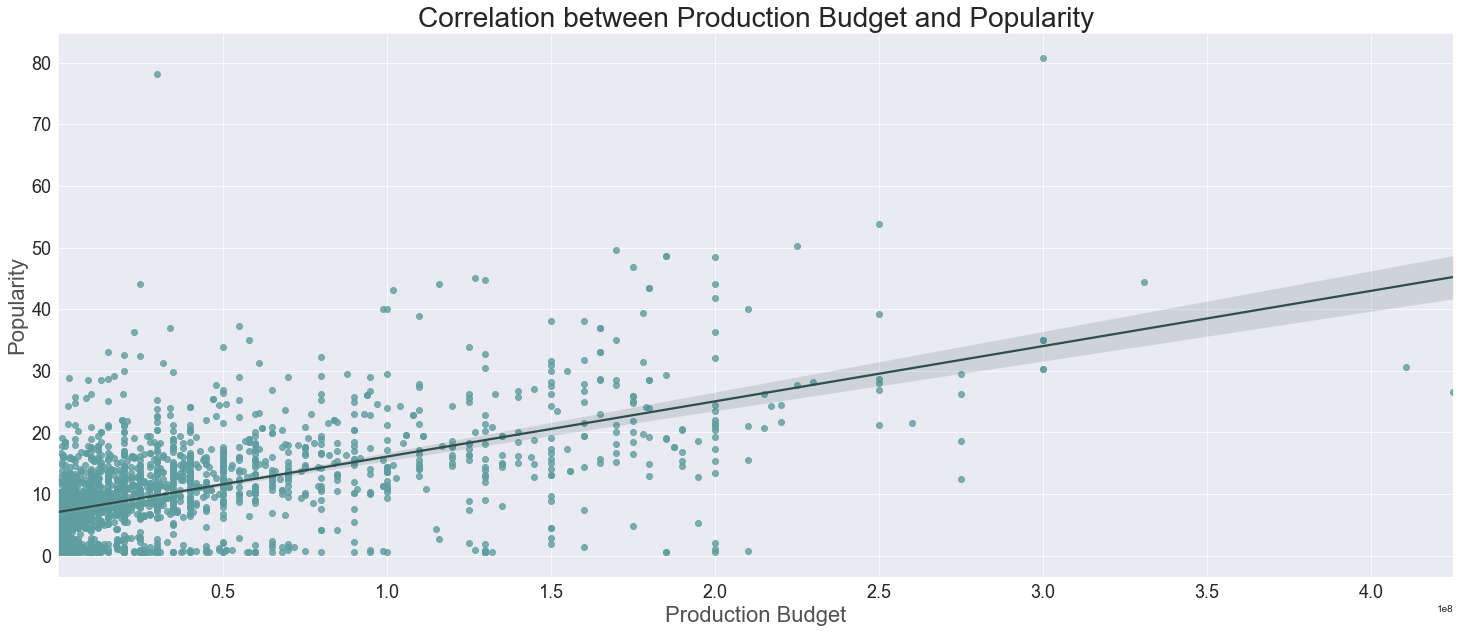

In [16]:
# Graph to show the Correlation between Production Budget and Popularity
plt.figure(figsize=(25, 10))
sns.set_style('darkgrid')
sns.regplot(x='production_budget', y='popularity', data=join_info, 
            scatter_kws={'color': 'cadetblue'}, line_kws={'color': 'darkslategray'})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Production Budget', fontsize=22, alpha=0.8)
plt.ylabel('Popularity', fontsize=22, alpha=0.8)
plt.title('Correlation between Production Budget and Popularity', fontsize=28)
plt.show()

#### Comment:
There is a positive correlation between Production Budget and Popularity

## Correlation between Production Budget and Profitability 

In [17]:
# Statistical information of the joined dataframe
join_info.describe()

,popularity,vote_average,vote_count,production_budget,worldwide_gross,profit
count,2202.000000,2202.000000,2202.000000,2.202000e+03,2.202000e+03,2.202000e+03
mean,10.565536,6.206312,1689.369664,3.868481e+07,1.214434e+08,8.275863e+07
std,8.226261,1.144313,2683.899420,5.258059e+07,2.258335e+08,1.862027e+08
min,0.600000,0.000000,1.000000,9.000000e+03,0.000000e+00,-1.104502e+08
25%,5.316000,5.600000,59.250000,5.000000e+06,2.693539e+06,-1.934264e+06
50%,9.395500,6.300000,606.000000,1.935000e+07,3.802305e+07,1.314742e+07
75%,14.244000,6.900000,2092.250000,4.800000e+07,1.236930e+08,7.845750e+07
max,80.773000,10.000000,22186.000000,4.250000e+08,2.776345e+09,2.351345e+09


#### Comment: 
Looking at the table above, we can see the avarage cost to make a movie and the average profit in the 'mean' row. The 'min' row can show the minimum cost to make a movie 

In [18]:
# Calculate the correlation between Production Budget and Profit
print('Correlation value between Production Budget and Profit: ', 
      (correlation(join_info['production_budget'], join_info['profit'])))

Correlation value between Production Budget and Profit:  0.69


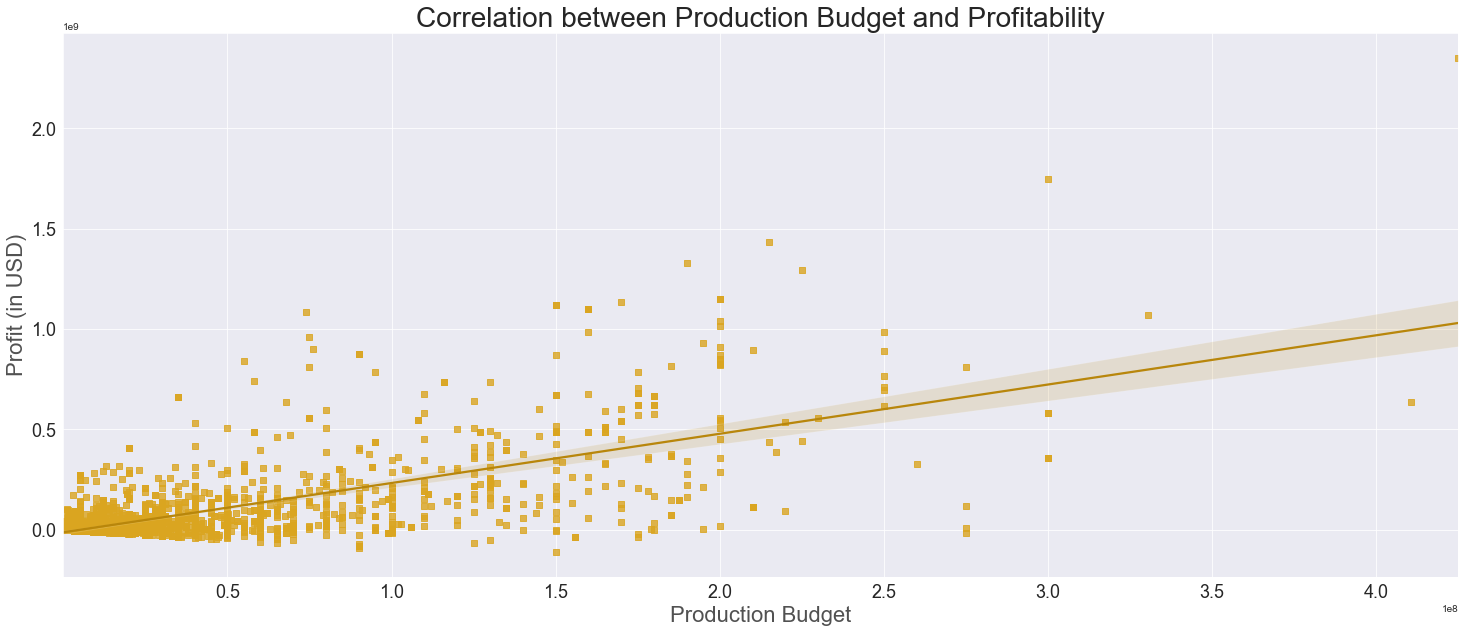

In [19]:
# Graph to show the Correlation between Production Budget and Profitability 
plt.figure(figsize=(25, 10))
sns.set_style('darkgrid')
sns.regplot(x='production_budget', y='profit', data=join_info, marker='s',
            scatter_kws={'color': 'goldenrod'}, line_kws={'color': 'darkgoldenrod'})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Production Budget', fontsize=22, alpha=0.8)
plt.ylabel('Profit (in USD)', fontsize=22, alpha=0.8)
plt.title('Correlation between Production Budget and Profitability', fontsize=28)
plt.show()

#### Comment:
There is a positive correlation between Production Budget and Profitability

## Average production cost for top 300 recent movies

### Based on Popularity

In [20]:
cur.execute('''SELECT movie_pop.*, production_budget, worldwide_gross, profit
               FROM movie_profit
               JOIN movie_pop
               ON movie_profit.title = movie_pop.title
               ORDER BY popularity DESC
               LIMIT 300;''')
top_300_pop = pd.DataFrame(cur.fetchall())
top_300_pop.columns = [i[0] for i in cur.description]
top_300_pop.head()

,title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,profit
0,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,300000000,2048134200,1748134200
1,John Wick,78.123,2014-10-24,7.2,10081,30000000,76235001,46235001
2,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,7.3,8392,250000000,945577621,695577621
3,The Avengers,50.289,2012-05-04,7.6,19673,225000000,1517935897,1292935897
4,Guardians of the Galaxy,49.606,2014-08-01,7.9,17958,170000000,770867516,600867516


In [21]:
#Calculate the average and the minimum production cost of most 300 popular movies 
top_300_pop.describe()

,popularity,vote_average,vote_count,production_budget,worldwide_gross,profit
count,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02
mean,25.741877,6.808000,5848.290000,1.083797e+08,4.282857e+08,3.199060e+08
std,8.562047,0.765478,4166.374948,7.895650e+07,3.851322e+08,3.307017e+08
min,17.861000,4.100000,217.000000,1.000000e+06,0.000000e+00,-5.092332e+07
25%,20.000000,6.200000,2446.500000,4.000000e+07,1.341074e+08,7.411051e+07
50%,23.097500,6.800000,4940.000000,9.500000e+07,3.157389e+08,2.197799e+08
75%,28.563000,7.400000,8097.250000,1.650000e+08,6.497720e+08,4.889868e+08
max,80.773000,8.400000,22186.000000,4.250000e+08,2.776345e+09,2.351345e+09


#### Comment:
Based on popularity, the average production cost is 108 millions dollars and the minimum production cost is 1 million dollar

### Based on Profit

In [22]:
cur.execute('''SELECT movie_pop.*, production_budget, worldwide_gross, profit
               FROM movie_profit
               JOIN movie_pop
               ON movie_profit.title = movie_pop.title
               ORDER BY profit DESC
               LIMIT 300;''')
top_300_profit = pd.DataFrame(cur.fetchall())
top_300_profit.columns = [i[0] for i in cur.description]
top_300_profit.head()

,title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,profit
0,Avatar,26.526,2009-12-18,7.4,18676,425000000,2776345279,2351345279
1,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,300000000,2048134200,1748134200
2,Jurassic World,20.709,2015-06-12,6.6,14056,215000000,1648854864,1433854864
3,Furious 7,20.396,2015-04-03,7.3,6538,190000000,1518722794,1328722794
4,The Avengers,50.289,2012-05-04,7.6,19673,225000000,1517935897,1292935897


In [23]:
#Calculate the average and the minimum production cost of top 300 profitable movies 
top_300_profit.describe()

,popularity,vote_average,vote_count,production_budget,worldwide_gross,profit
count,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02
mean,20.102303,6.758333,6069.580000,1.201063e+08,5.711482e+08,4.510420e+08
std,11.301159,0.857603,4279.922376,7.243491e+07,3.360710e+08,2.909261e+08
min,0.600000,4.000000,1.000000,3.000000e+06,1.775120e+08,1.741830e+08
25%,14.074000,6.200000,2932.000000,6.400000e+07,3.281579e+08,2.389965e+08
50%,19.207000,6.800000,5246.000000,1.250000e+08,4.862623e+08,3.537380e+08
75%,26.177750,7.400000,8669.000000,1.650000e+08,7.216985e+08,5.623561e+08
max,80.773000,10.000000,22186.000000,4.250000e+08,2.776345e+09,2.351345e+09


#### Comment:
Based on profit, the average production cost is 120 millions dollars and the minimum production cost is 3 million dollar

# FINAL RESULTS

## Production Budget v.s. Popularity and Profitability 

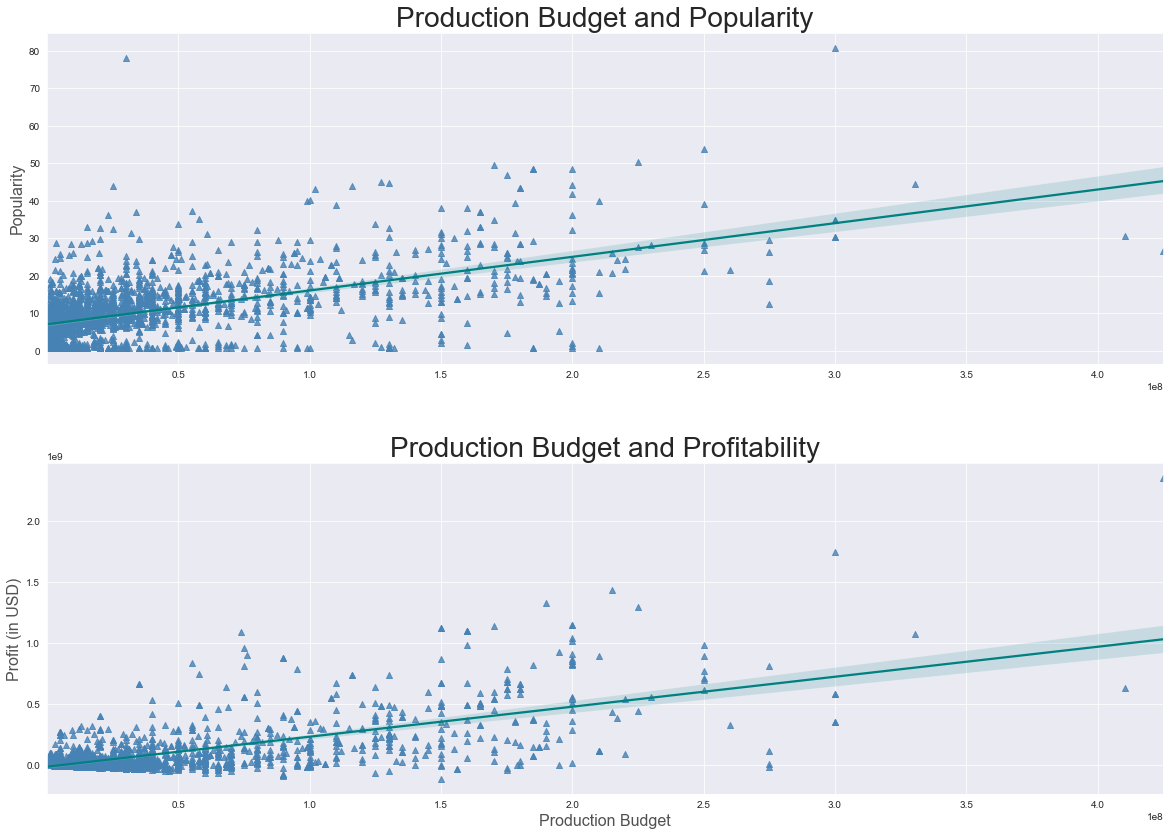

Correlation value between Production Budget and Popularity:  0.57
Correlation value between Production Budget and Profit:  0.69


In [24]:
budget_pop_pro = plt.figure(figsize=(20, 14))
b_pop = budget_pop_pro.add_subplot(211)
b_pro = budget_pop_pro.add_subplot(212)
sns.set_style('dark')

sns.regplot(x='production_budget', y='popularity', data=join_info, ax=b_pop, marker='^',
            scatter_kws={'color': 'steelblue'}, line_kws={'color': 'teal'})
sns.regplot(x='production_budget', y='profit', data=join_info, ax=b_pro, marker='^',
            scatter_kws={'color': 'steelblue'}, line_kws={'color': 'teal'})

b_pop.set_title('Production Budget and Popularity', fontsize=28)
b_pop.set_xlabel('')
b_pop.set_ylabel('Popularity', fontsize=16, alpha=0.8)

b_pro.set_title('Production Budget and Profitability', fontsize=28)
b_pro.set_xlabel('Production Budget', fontsize=16, alpha=0.8)
b_pro.set_ylabel('Profit (in USD)', fontsize=16, alpha=0.8)

plt.subplots_adjust(hspace = 0.3)

plt.show()

print('Correlation value between Production Budget and Popularity: ', 
      (correlation(join_info['production_budget'], join_info['popularity'])))
print('Correlation value between Production Budget and Profit: ', 
      (correlation(join_info['production_budget'], join_info['profit'])))